## Supervised

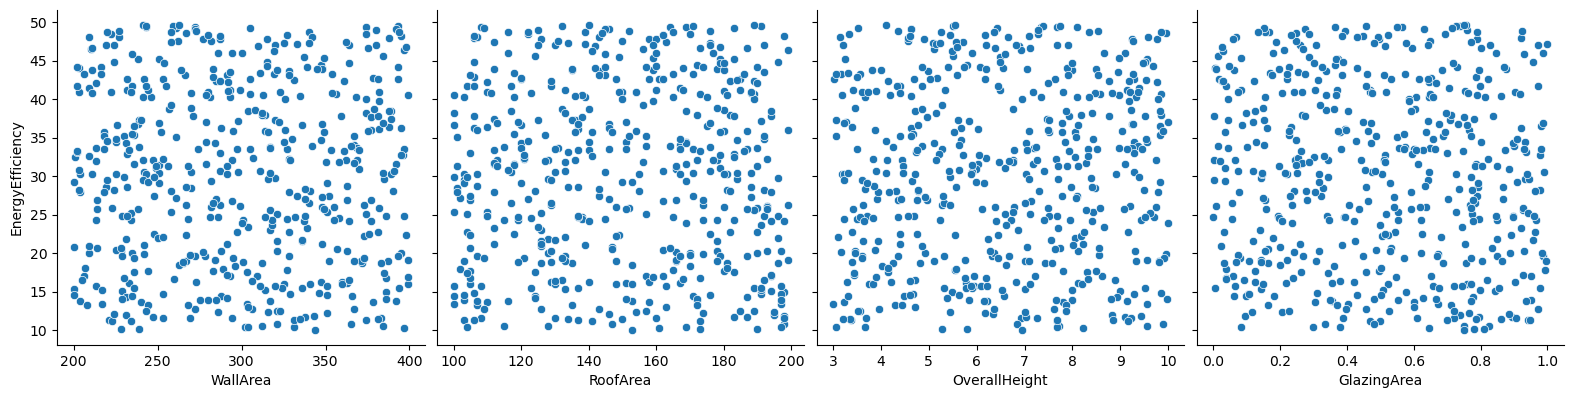

Mean Squared Error: 146.02051889440582


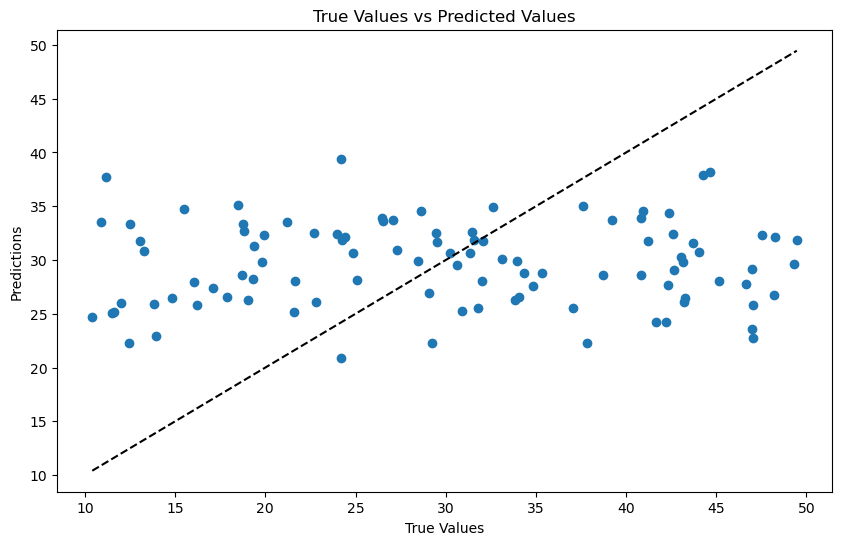

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

## Clustering

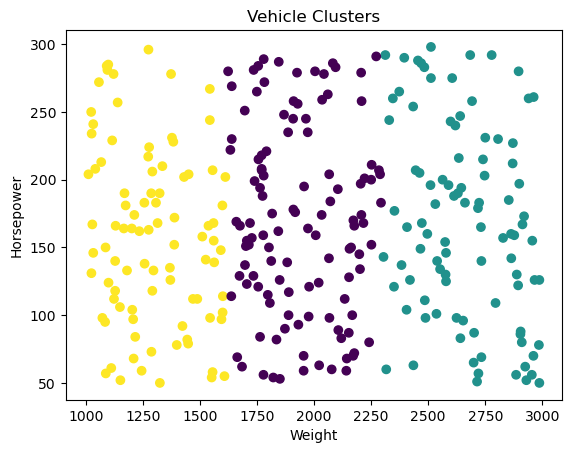

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

## Decision Tree

Model Accuracy: 1.0


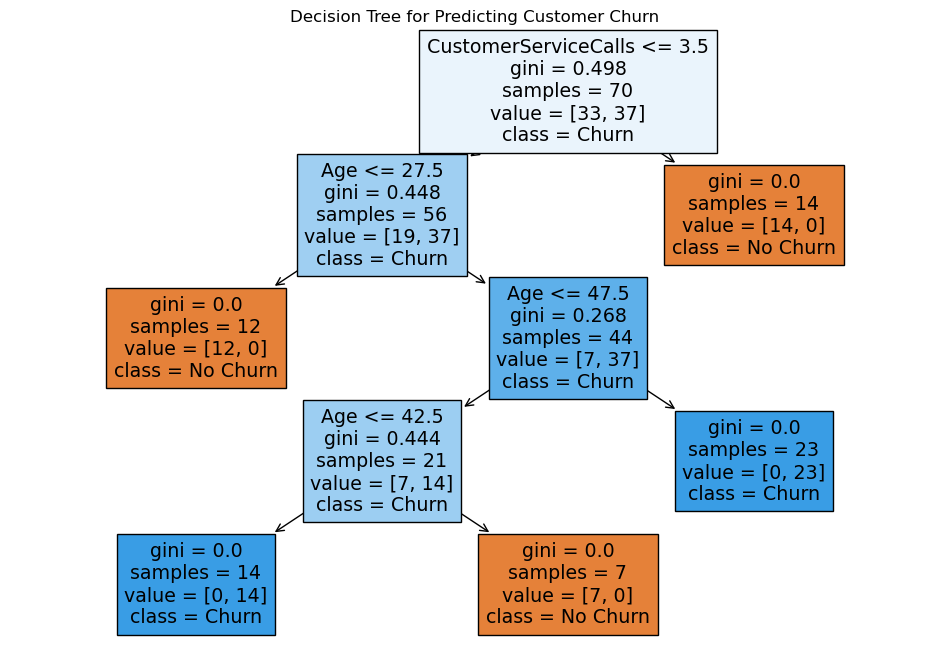

In [6]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
    'CustomerID': range(1, 101),  # Unique ID for each customer
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
    'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
    'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

## Neural Network

In [7]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 0.7147 - accuracy: 0.4688
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.4750
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4938
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.4750
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.4875
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 8/10
16/16 [==============================] - 0s 26ms/step - loss: 0.6818 - accuracy: 0.5250
Epoch 9/10
16/16 [==============================] - 0s 17ms/step - loss: 0.6782 - accuracy: 0.5312
Epoch 10/10
16/16 [==============================] - 0s 22ms/step - loss: 0.6745 - accuracy: 0.5625


In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 0s/step - loss: 0.6819 - accuracy: 0.5750
Test Accuracy: 0.574999988079071


Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 0.6748 - accuracy: 0.5469 - val_loss: 0.6541 - val_accuracy: 0.6875
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5625 - val_loss: 0.6507 - val_accuracy: 0.6875
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6687 - accuracy: 0.5781 - val_loss: 0.6470 - val_accuracy: 0.6875
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.5938 - val_loss: 0.6433 - val_accuracy: 0.6875
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6622 - accuracy: 0.6094 - val_loss: 0.6389 - val_accuracy: 0.6875
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6587 - accuracy: 0.6172 - val_loss: 0.6346 - val_accuracy: 0.6875
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.6250 - val_loss: 0.6303 - val_accuracy: 0.6875
Epoch 8/10
13/13 [=

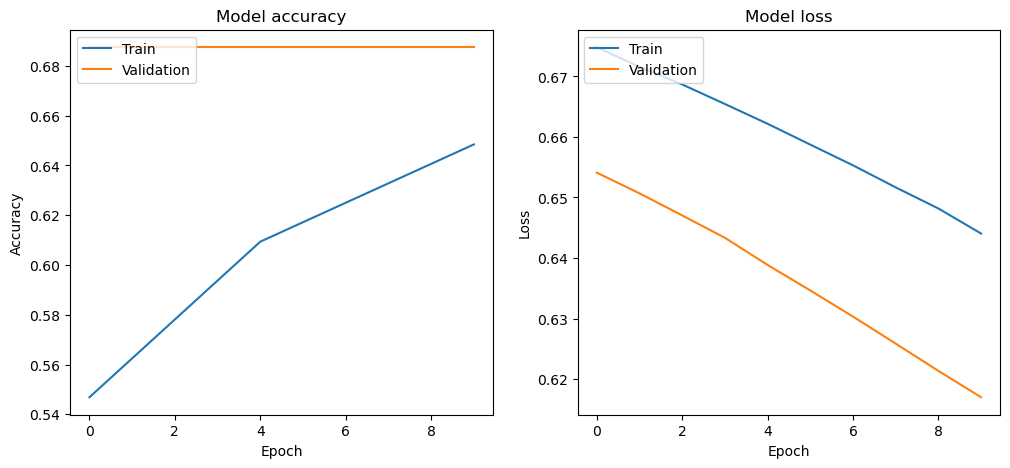

In [11]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 1s 2ms/step


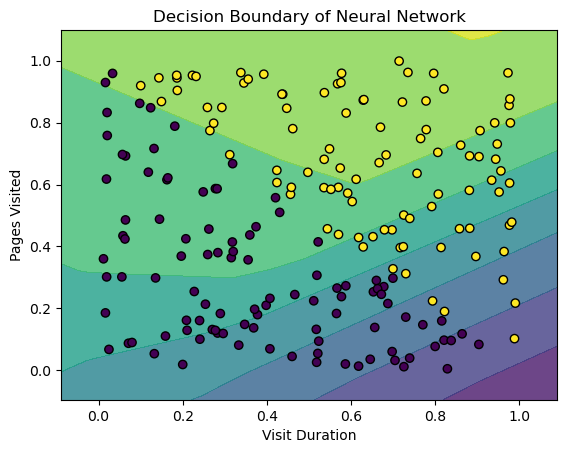

In [12]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()